<a href="https://colab.research.google.com/github/KDManikandan/25DaysInMachineLearning/blob/master/Loan_status_Mini_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [2]:
train = pd.read_csv("https://datahack-prod.s3.amazonaws.com/train_file/train_ctrUa4K.csv")
test = pd.read_csv("https://datahack-prod.s3.amazonaws.com/test_file/test_lAUu6dG.csv")
submission = pd.read_csv("https://datahack-prod.s3.amazonaws.com/sample_submission/sample_submission_49d68Cx.csv")

In [3]:
train.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train.columns.difference(test.columns)

Index(['Loan_Status'], dtype='object')

In [6]:
test.columns.difference(train.columns)

Index([], dtype='object')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [8]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [10]:
new_dataset=pd.concat([train,test])

In [11]:
new_dataset.isna().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [12]:
train["source"]="train"

In [13]:
test["source"]="test"

<Axes: xlabel='Loan_Status', ylabel='count'>

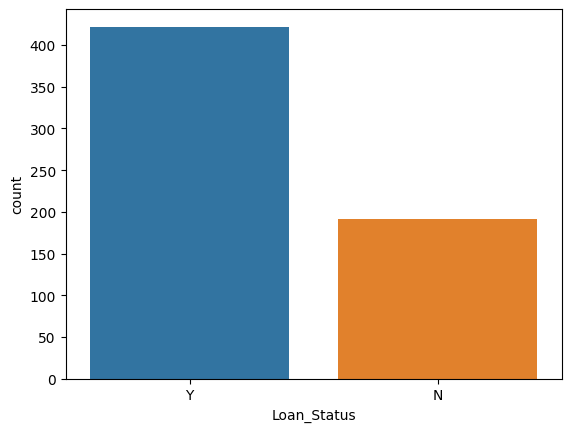

In [14]:
sns.countplot(data = new_dataset,x='Loan_Status')

In [15]:
train.loc[:,~train.columns.isin(['Loan_Id'])].select_dtypes(exclude = np.number).columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area', 'Loan_Status', 'source'],
      dtype='object')

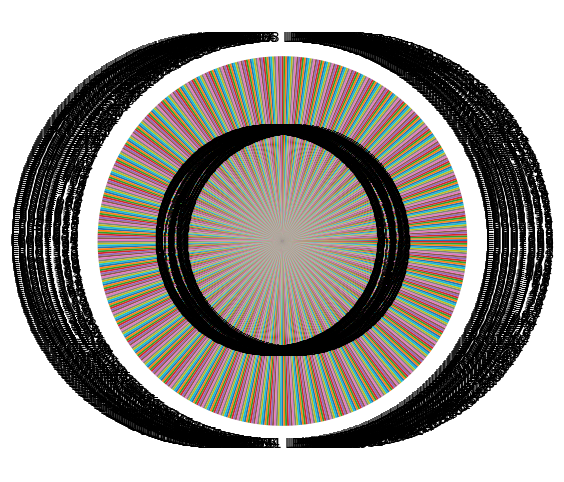

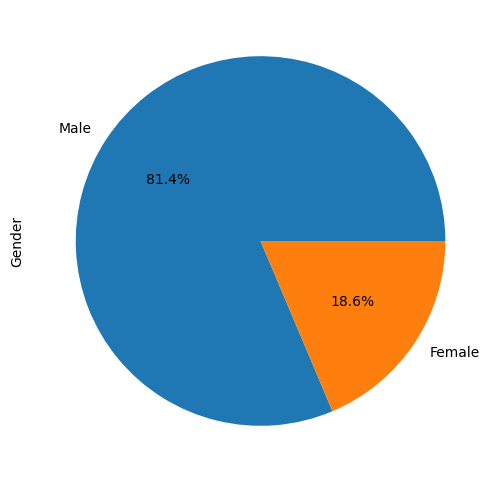

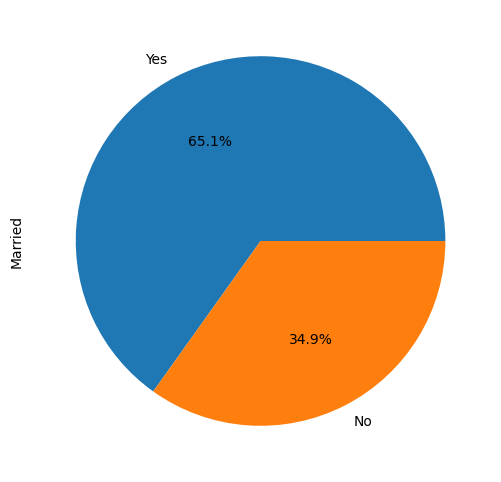

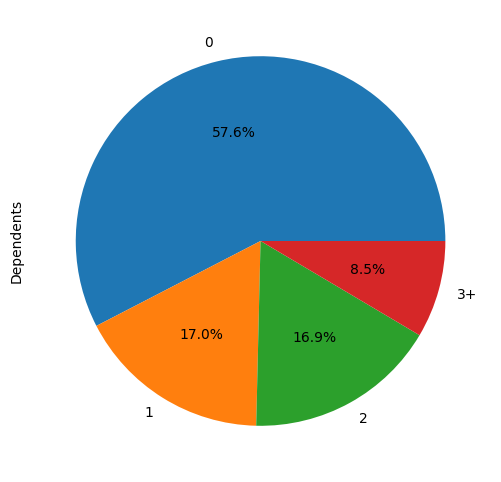

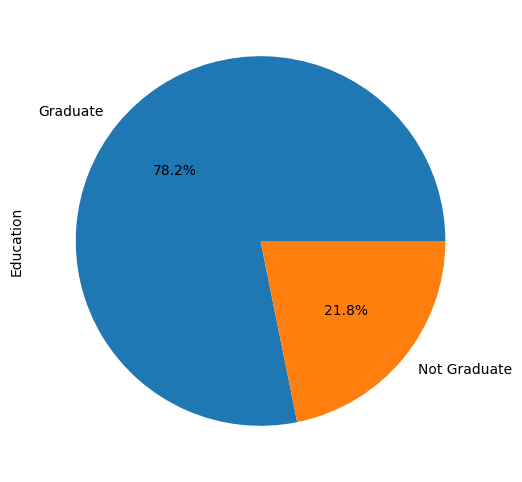

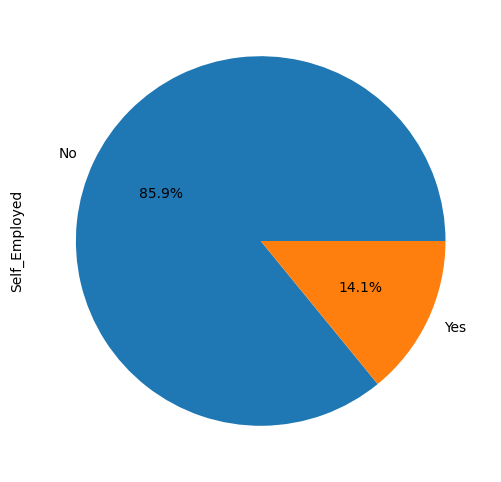

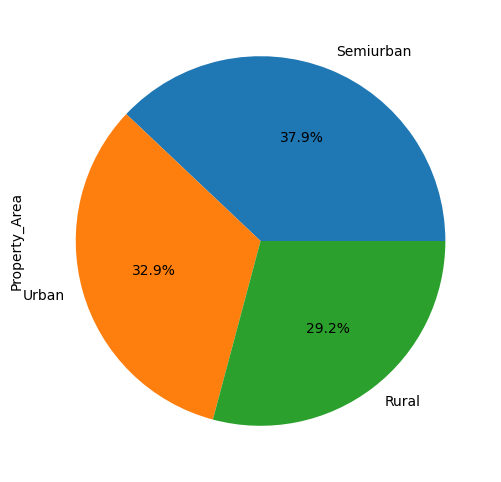

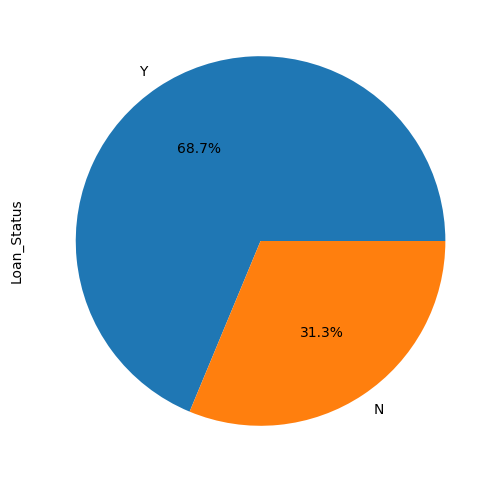

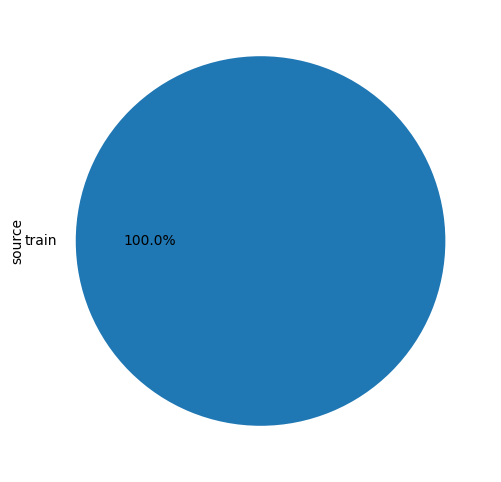

In [16]:
for i in train.loc[:,~train.columns.isin(['Loan_Id'])].select_dtypes(exclude=np.number).columns:
  train[i].value_counts().plot.pie(subplots = True, figsize=(11,6),autopct='%1.1f%%')
  plt.show()

In [17]:
new_dataset['Credit_History'].value_counts()

1.0    754
0.0    148
Name: Credit_History, dtype: int64

In [18]:
new_dataset["Property_Area"].value_counts()

Semiurban    349
Urban        342
Rural        290
Name: Property_Area, dtype: int64

In [19]:
%matplotlib inline

<Axes: >

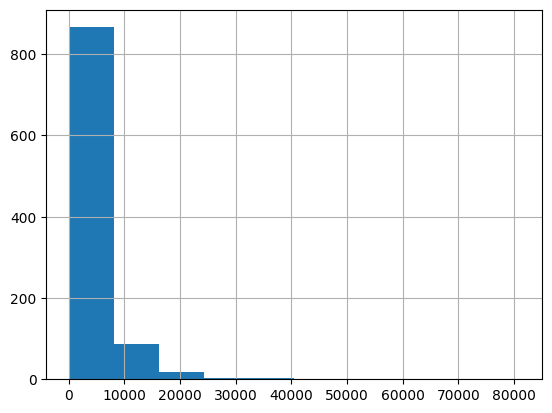

In [20]:
new_dataset["ApplicantIncome"].hist()

<Axes: >

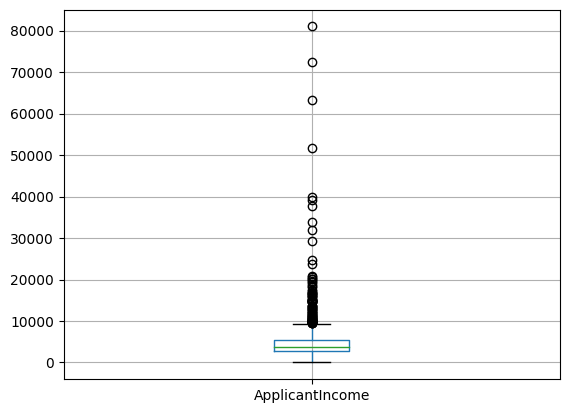

In [21]:
new_dataset.boxplot(column='ApplicantIncome')

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

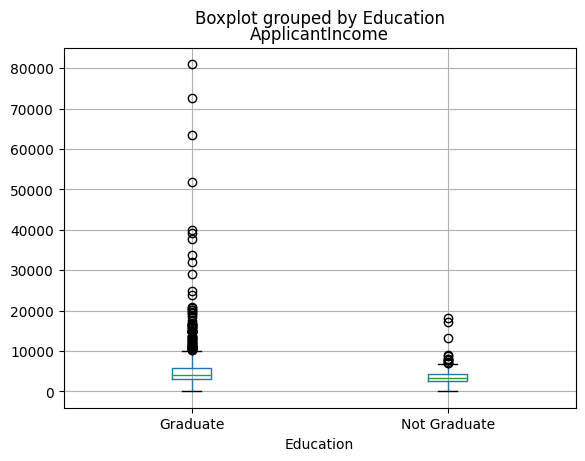

In [22]:
new_dataset.boxplot(column='ApplicantIncome', by='Education')

The above chart says the higher number of graduates with high income

<Axes: >

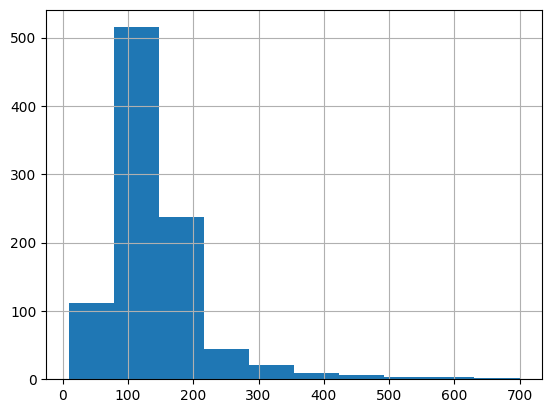

In [23]:
new_dataset["LoanAmount"].hist()

<Axes: >

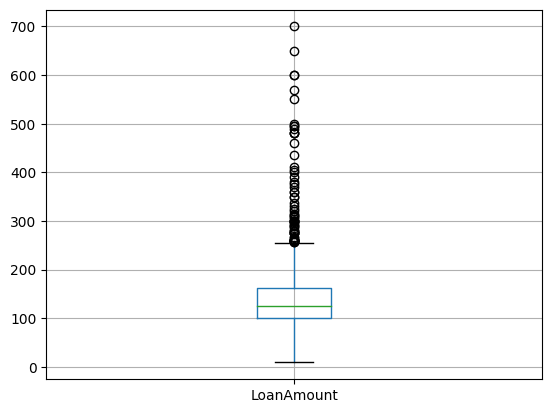

In [24]:
new_dataset.boxplot(column='LoanAmount')

<Axes: title={'center': 'LoanAmount'}, xlabel='Gender'>

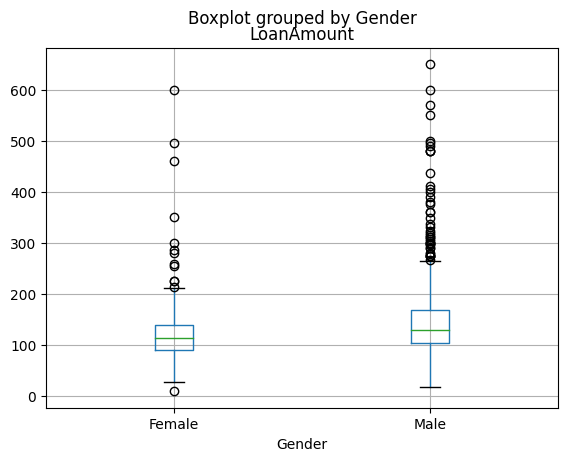

In [25]:
new_dataset.boxplot(column='LoanAmount', by='Gender')

In [26]:
pd.crosstab(new_dataset['Credit_History'], new_dataset['Loan_Status'],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [27]:
def percentageConvert(ser):
  return ser/float(ser[-1])  

In [28]:
new_dateset=pd.crosstab(new_dataset["Credit_History"], new_dataset["Loan_Status"],margins=True).apply(percentageConvert,axis=1)


In [29]:
new_dataset['TotalIncome']=new_dataset['ApplicantIncome']+new_dataset['CoapplicantIncome']

In [30]:
new_dataset['LoanAmount_log']=np.log(new_dataset['LoanAmount'])


In [31]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder

In [32]:
new_dataset['Gender'].fillna(new_dataset['Gender'].mode()[0],inplace=True)
new_dataset['Married'].fillna(new_dataset['Married'].mode()[0],inplace=True)
new_dataset['Dependents'].fillna(new_dataset['Dependents'].mode()[0],inplace=True)
new_dataset['Credit_History'].fillna(new_dataset['Credit_History'].mode()[0],inplace=True)
cat=['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']
for var in cat:
  le=preprocessing.LabelEncoder()
  new_dataset[var]=le.fit_transform(new_dataset[var].astype('str'))
  

In [33]:
new_dataset.dtypes

Loan_ID               object
Gender                 int64
Married                int64
Dependents             int64
Education              int64
Self_Employed          int64
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History         int64
Property_Area          int64
Loan_Status           object
TotalIncome          float64
LoanAmount_log       float64
dtype: object

In [37]:
new_dataset['LoanAmount'].fillna(new_dataset['LoanAmount'].mean(),inplace=True)
new_dataset['LoanAmount_log'].fillna(new_dataset['LoanAmount_log'].mean(),inplace=True)
new_dataset['Loan_Amount_Term'].fillna(new_dataset['Loan_Amount_Term'].mean(),inplace=True)
new_dataset['ApplicantIncome'].fillna(new_dataset['ApplicantIncome'].mean(),inplace=True)
new_dataset['CoapplicantIncome'].fillna(new_dataset['CoapplicantIncome'].mean(),inplace=True)

new_dataset['Gender'].fillna(new_dataset['Gender'].mode()[0],inplace=True)
new_dataset['Married'].fillna(new_dataset['Married'].mode()[0],inplace=True)
new_dataset['Dependents'].fillna(new_dataset['Dependents'].mode()[0],inplace=True)
new_dataset['Loan_Amount_Term'].fillna(new_dataset['Loan_Amount_Term'].mode()[0],inplace=True)
new_dataset['Credit_History'].fillna(new_dataset['Credit_History'].mode()[0],inplace=True)

<Axes: >

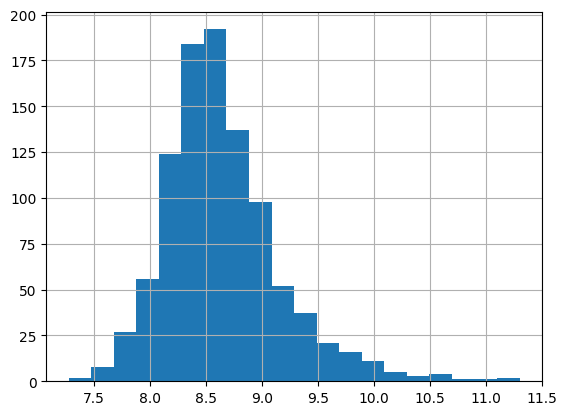

In [38]:
new_dataset['TotalIncome_log']=np.log(new_dataset['TotalIncome'])
new_dataset['TotalIncome_log'].hist(bins=20)

In [44]:
train_df = new_dataset.loc[new_dataset['Loan_Status'].isna()==False]
test_df = new_dataset.loc[new_dataset['Loan_Status'].isna()==True]

In [45]:
from sklearn.linear_model import LogisticRegression

In [47]:
predictors_Logistic=['Credit_History','Education','Gender']
x_train=new_dataset[list(predictors_Logistic)].values
y_train=new_dataset["Loan_Status"].values
x_test=new_dataset[list(predictors_Logistic)].values

In [56]:
clf_0 = LogisticRegression().fit(x_train,y_train)
pred_y_0 = clf_0.predict(val_x)
accuracy_score(pred_y_0,val_y)

ValueError: ignored

In [51]:
model=LogisticRegression()
model.fit(x_train,y_train)
predicted=model.predict(x_test)
predicted = number.inverse_transform(predicted)
new_dataset['Loan_Status']=predicted
outcome_var='Loan_Status'
classification_model(model,df,predictors_Logistic,outcome_var)
new_dataset.to_csv("Logistic_Prediction.csv",column=['Loan_ID','Loan_Status'])

ValueError: ignored

In [52]:
new_dataset.isnull().sum()

Loan_ID                0
Gender                 0
Married                0
Dependents             0
Education              0
Self_Employed          0
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount             0
Loan_Amount_Term       0
Credit_History         0
Property_Area          0
Loan_Status          367
TotalIncome            0
LoanAmount_log         0
TotalIncome_log        0
dtype: int64